In [1]:
## Don't change this, just let it be
import sys
sys.path.append("python")
from IPython.display import display, set_matplotlib_formats
import scripts as scr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = 'data/rtfMRI_methods_review_included_studies_procsteps_incl_rtcorr.txt'
filename_defaults = 'data/rtfMRI_methods_review_included_studies_procsteps_DEFAULTS.txt'
fn = filename
df_studies = pd.read_csv(fn, sep='\t', lineterminator='\r')
df_studies = df_studies.dropna(axis='columns')
N_studies = df_studies.shape[0]
df_studies = df_studies.replace('HIGHPASS', 'HIGH')
df_studies = df_studies.replace('LOWPASS', 'LOW')
df_studies = df_studies.replace('BANDPASS', 'BAND')
df_studies = df_studies.replace('ROI DIFF', 'ROID')
df_studies = df_studies.replace('KALMAN', 'KALM')
df_studies = df_studies.replace('Custom Matlab + SPM', 'Mat+SPM')
df_studies = df_studies.replace('Custom Other', 'Cust Other')
df_studies = df_studies.replace('BioImage Suite', 'BI Suite')
N_studies = df_studies.shape[0]

<Figure size 432x288 with 0 Axes>

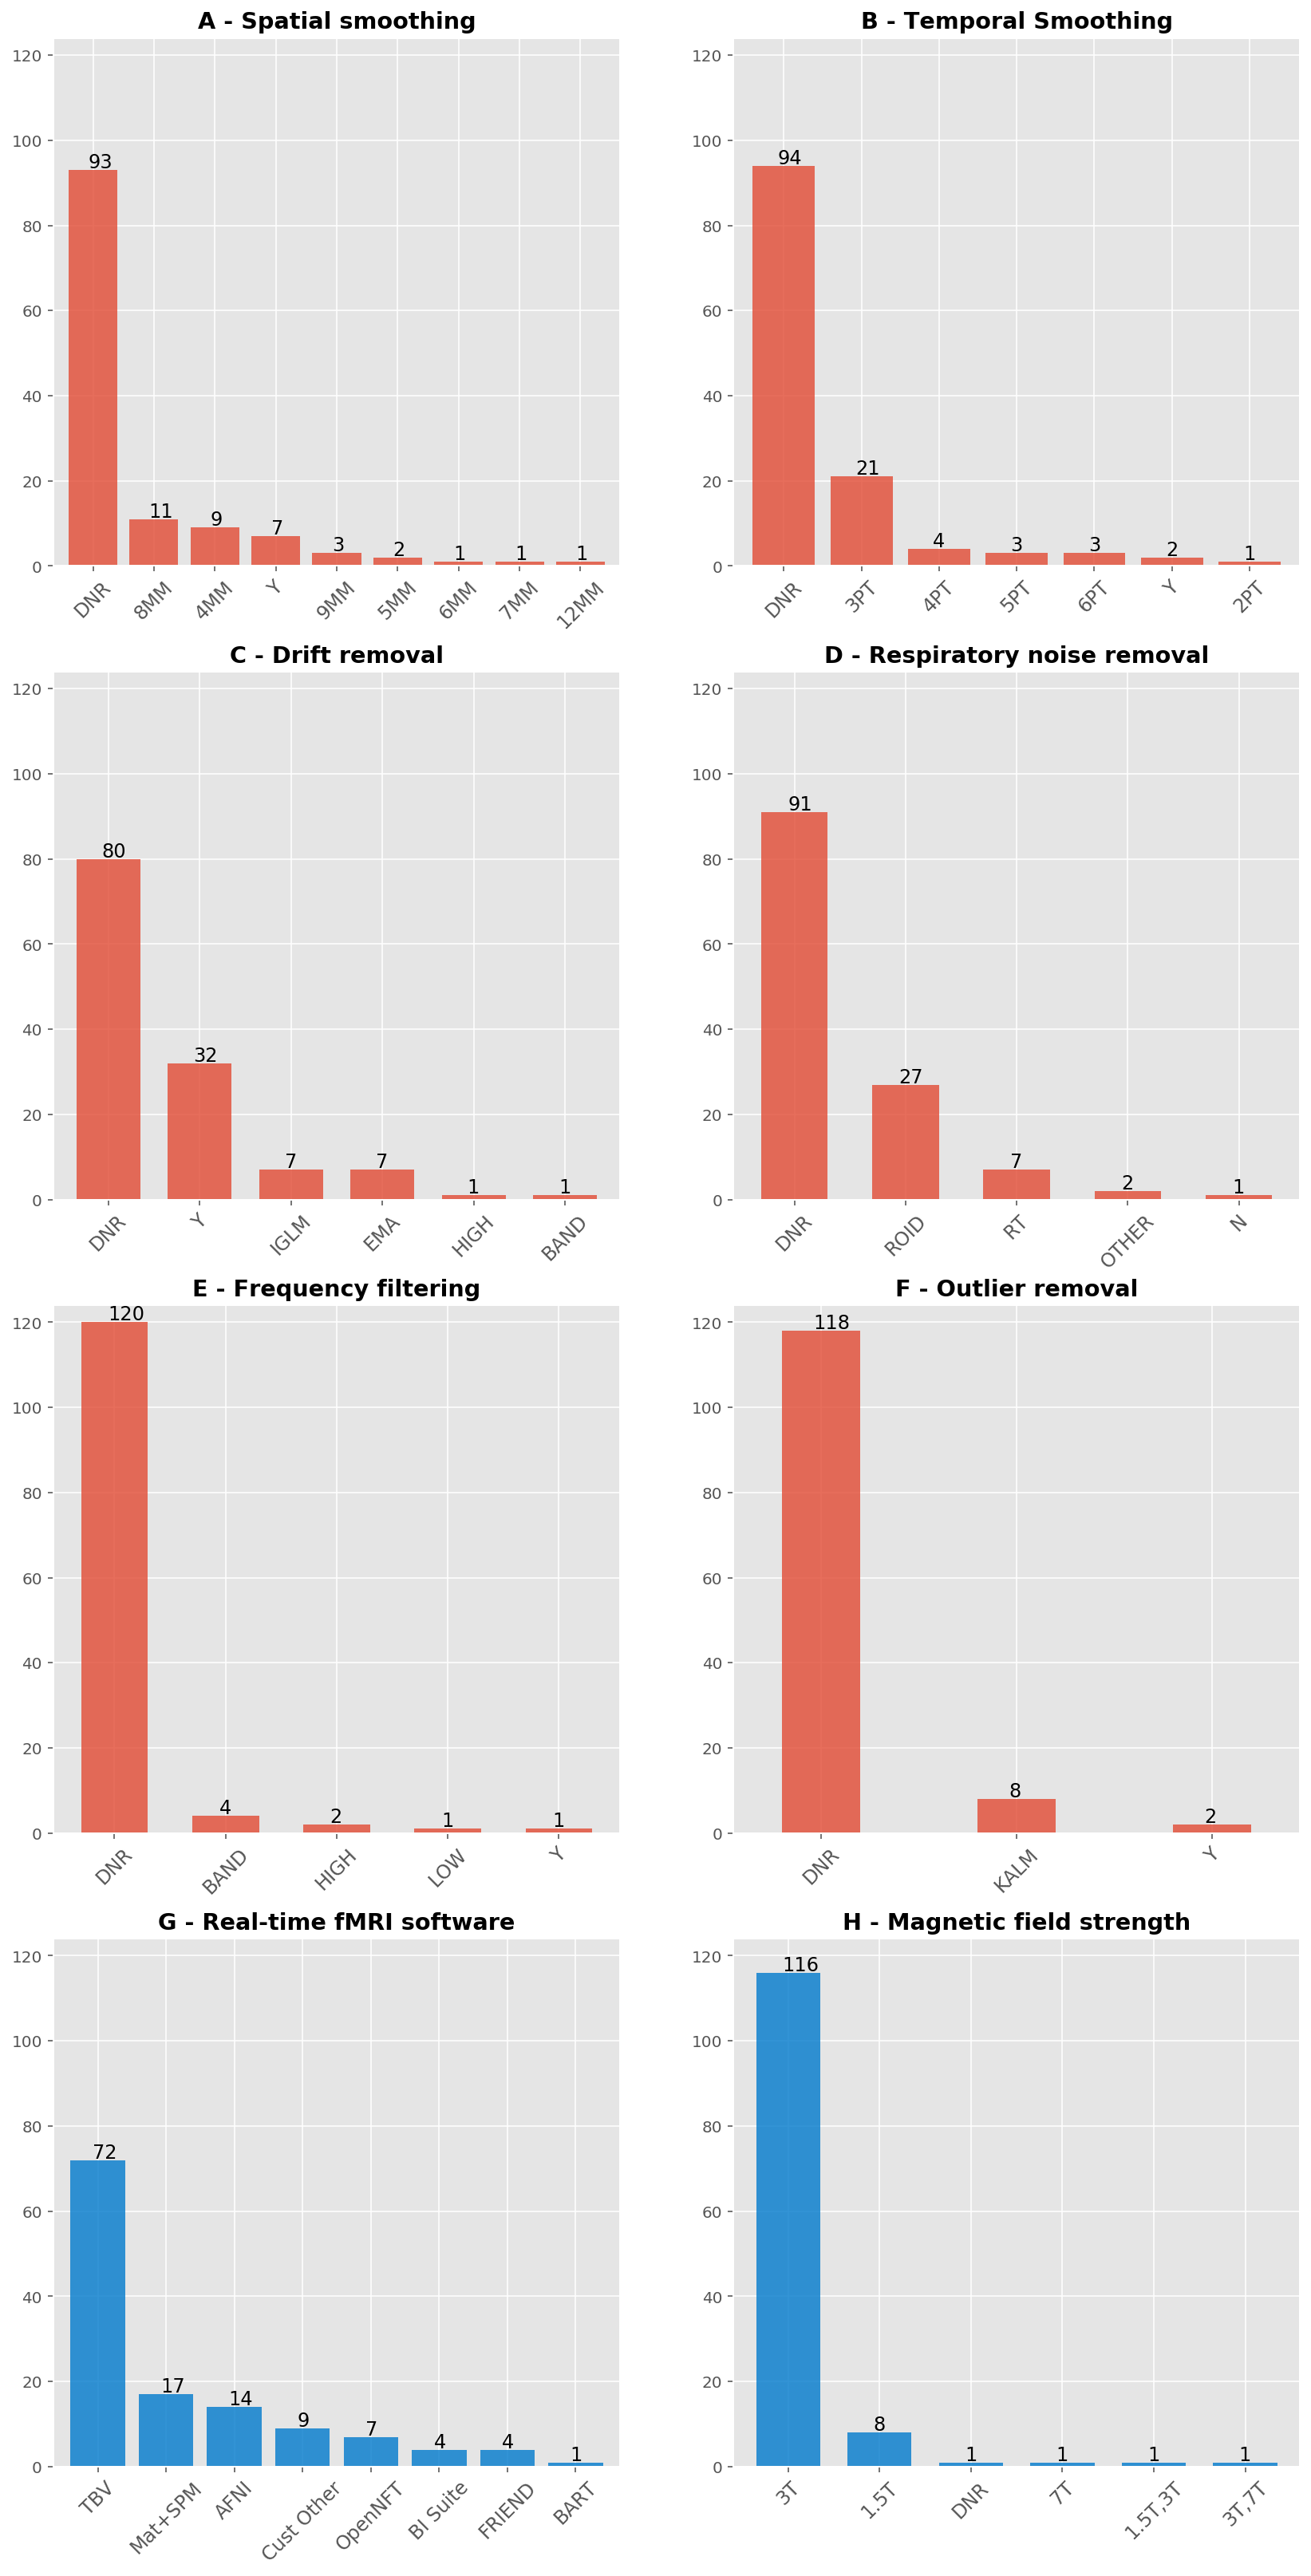

In [5]:
titles = ['A - Spatial smoothing',
          'B - Temporal Smoothing',
          'C - Drift removal',
          'D - Respiratory noise removal',
          'E - Frequency filtering',
          'F - Outlier removal',
          'G - Real-time fMRI software',
          'H - Magnetic field strength']

cols = ['ss',
        'ts',
        'dr',
        'resp_corr',
        'ff',
        'or',
        'software',
        'magnet']

widths = {3:0.4,
          4:0.5,
          5:0.6,
          6:0.7,
          7:0.8,
          8:0.8,
          9:0.8}

# fig.tight_layout()
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
set_matplotlib_formats('retina', quality=100)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=2)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=10)

fig = plt.figure(figsize=(14,28))
axs = []
for i in range(8):
    axs.append(fig.add_subplot(4,2,i+1, ylim=(0, 124)))
    series = df_studies[cols[i]].value_counts()
    inds = list(series.index)
    vals = list(series.values)
    
    if i < 6:
        bars = series.plot(kind='bar', width=widths[len(inds)], legend=False, ax=axs[-1], alpha=0.8)    
    else:
        bars = series.plot(kind='bar', width=widths[len(inds)], legend=False, ax=axs[-1], alpha=0.8, color='#007acc')
    
    axs[-1].set_title(titles[i], weight='bold')
    plt.xticks(rotation=45)
    
    for p in axs[-1].patches:
        axs[-1].annotate(str(p.get_height()), (p.get_x() + 0.4 * p.get_width(), p.get_height() + 0.5), size=12)


In [6]:
fig.savefig('fig7.png', dpi=300, format='png', bbox_inches='tight')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


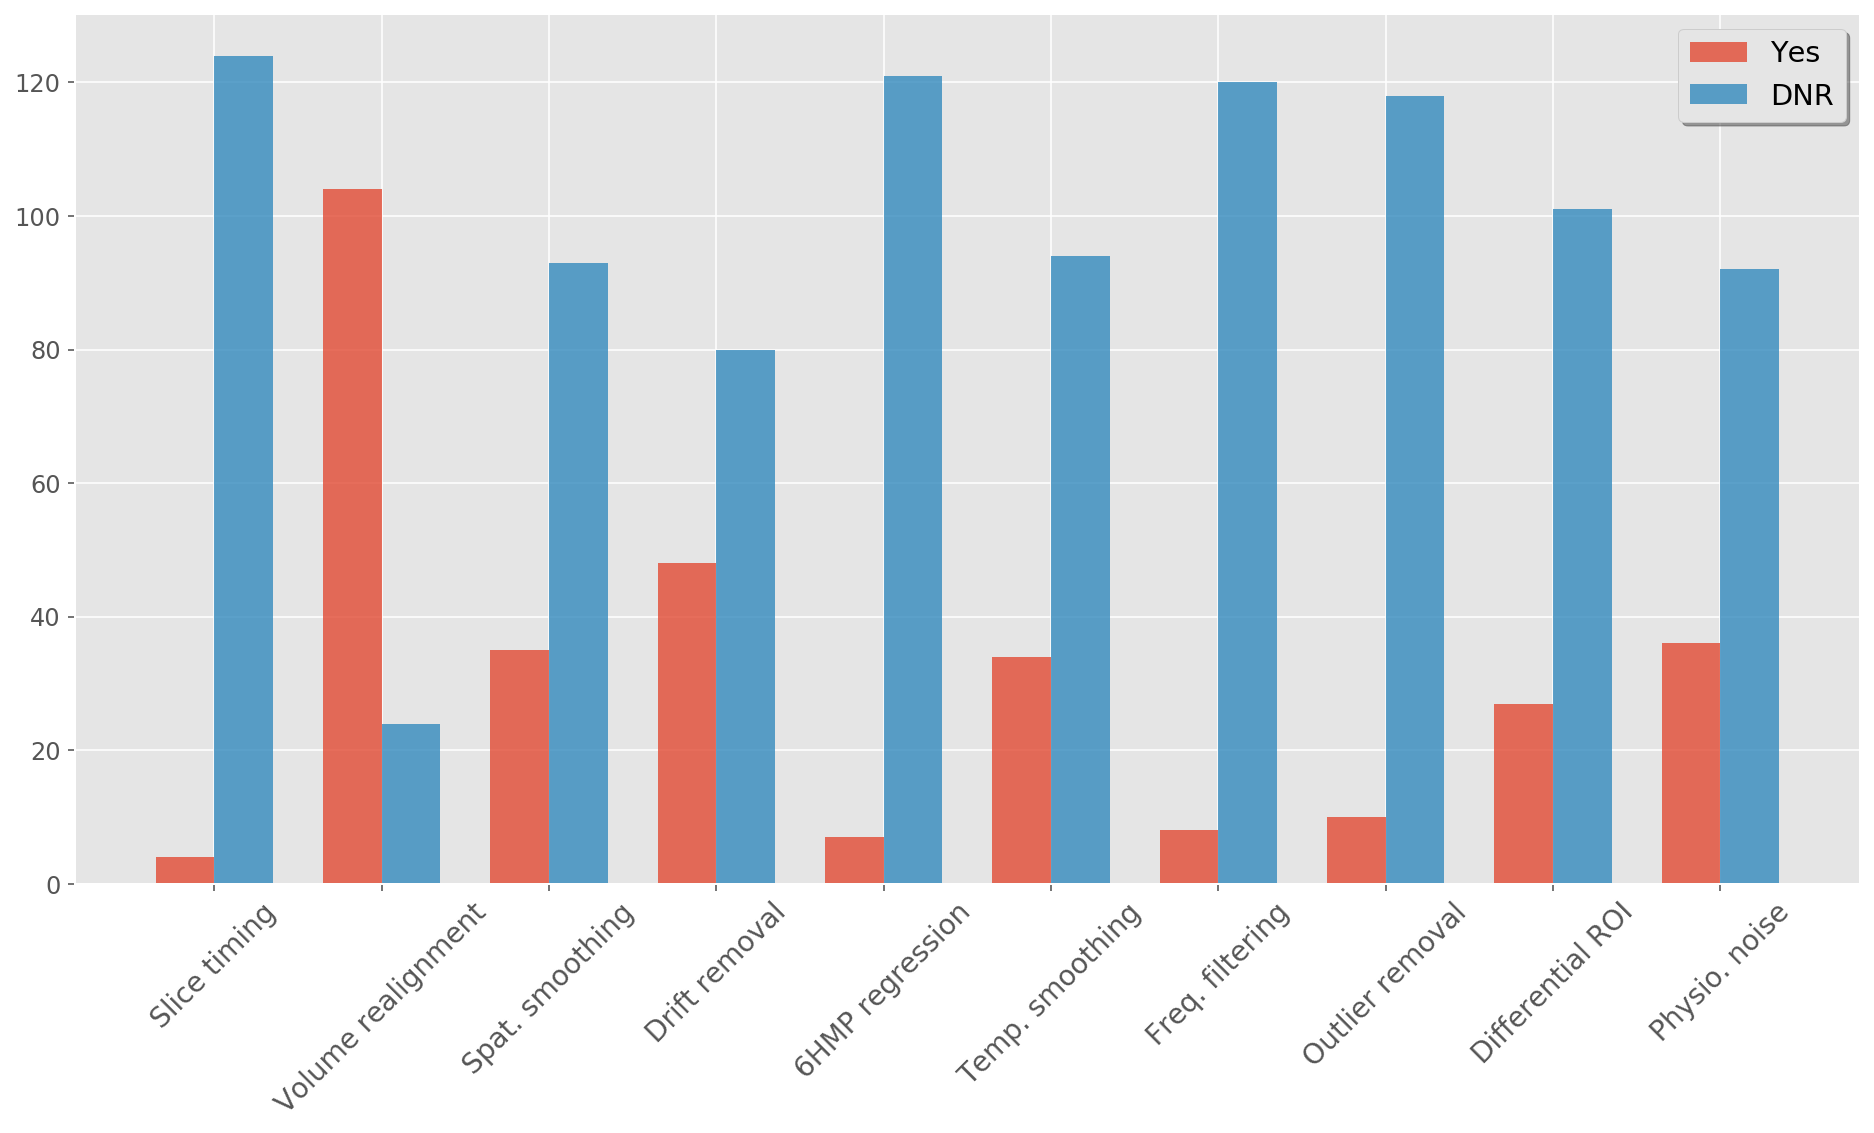

In [4]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=12)
plt.rcParams['legend.fontsize'] = 'x-large' # {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
feats = ['stc', 'mc', 'ss', 'dr', 'hmp', 'ts', 'ff', 'or', 'droi', 'resp_corr']
feat_names = ('Slice timing',
              'Volume realignment',
              'Spat. smoothing',
              'Drift removal',
              '6HMP regression',
              'Temp. smoothing',
              'Freq. filtering',
              'Outlier removal',
              'Differential ROI',
              'Physio. noise')
yes_counts = [None] * len(feats)
dnr_no_counts = [None] * len(feats)

for i in range(len(feats)):
    
    series = df_studies[feats[i]].value_counts()
    inds = list(series.index)
    vals = list(series.values)
    
    dnr_no_counts[i] = 0
    if 'N' in inds:
        dnr_no_counts[i] += series['N']
    if 'DNR' in inds:
        dnr_no_counts[i] += series['DNR']
        
    yes_counts[i] = N_studies - dnr_no_counts[i]
    

fig2 = plt.figure(figsize=(16,8))
ax2 = fig2.subplots()
ind = np.arange(len(feats))
width = 0.35
p1 = ax2.bar(ind, yes_counts, width, alpha=0.8)
p2 = ax2.bar(ind + width, dnr_no_counts, width, alpha=0.8)

ax2.set_xticks(ind + width / 2)
ax2.set_xticklabels(feat_names)
ax2.legend((p1[0], p2[0]), ('Yes', 'DNR'), fancybox=True, shadow=True)
ax2.autoscale_view()


plt.xticks(rotation=45)

plt.show()

In [7]:
fig2.savefig('fig6.png', dpi=300, format='png', bbox_inches='tight')
